<a href="https://colab.research.google.com/github/kuds/rl-lunar-lander/blob/main/%5BLunar%20Lander%5D%20Soft%20Actor-Critic%20(SAC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Soft Actor-Critic (SAC)
---
In this notebook, you will implement a SAC agent with Gymnasiums's LunarLander-v2 environment.

### 1. Import the Necessary Packages

In [1]:
!pip install swig

In [2]:
!pip install stable_baselines3 gymnasium[box2d]

In [3]:
import gymnasium
import stable_baselines3
from stable_baselines3 import SAC
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.vec_env import VecFrameStack, VecTransposeImage
from stable_baselines3.common.vec_env import VecVideoRecorder

import os
import torch
import numpy
import scipy
import platform
import IPython
import matplotlib
import matplotlib.pyplot

In [4]:
print("Python Version: {}".format(platform.python_version()))
print("Is Cuda Available: {}".format(torch.cuda.is_available()))
print("Torch Version: {}".format(torch.__version__))
print("Cuda Version: {}".format(torch.version.cuda))
print("Scipy Version: {}".format(scipy.__version__))
print("Numpy Version: {}".format(numpy.__version__))
print("Stable Baseline Version: {}".format(stable_baselines3.__version__))
print("IPython Version: {}".format(IPython.__version__))
print("Gymnasium Version: {}".format(gymnasium.__version__))

Python Version: 3.10.12
Is Cuda Available: True
Torch Version: 2.5.0+cu121
Cuda Version: 12.1
Scipy Version: 1.13.1
Numpy Version: 1.26.4
Stable Baseline Version: 2.3.2
IPython Version: 7.34.0
Gymnasium Version: 0.29.1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
env = gymnasium.make('LunarLanderContinuous-v2')
print("Observation Space Size: ", env.observation_space.shape)
print("Action Space Size: ", env.action_space.shape)
env.close()

Observation Space Size:  (8,)
Action Space Size:  (2,)


In [6]:
env_str = "LunarLanderContinuous-v2"
log_dir = "./logs/{}".format(env_str)

In [7]:
#Create Training Environment
env = make_vec_env(env_str, n_envs=1)

#Create Evaluation Environment
env_val = make_vec_env(env_str, n_envs=1)

eval_callback = EvalCallback(env_val,
                             best_model_save_path=log_dir,
                             log_path=log_dir,
                             eval_freq=25_000,
                             render=False,
                             n_eval_episodes=20)

# Initialize SAC
model = SAC('MlpPolicy', env, verbose=0)

# Train the model
model.learn(total_timesteps=300_000,
            progress_bar=True,
            callback=eval_callback)

# Save the model
model.save(os.path.join(log_dir, "sac_lunar_lander"))

# Evaluate the model
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=20)
print(f"Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

env.close()
env_val.close()

Output()

Eval num_timesteps=25000, episode_reward=-67.01 +/- 107.99

Episode length: 885.25 +/- 269.75

New best mean reward!

Eval num_timesteps=50000, episode_reward=-147.54 +/- 109.16

Episode length: 658.25 +/- 253.20

Eval num_timesteps=75000, episode_reward=148.83 +/- 82.80

Episode length: 817.55 +/- 167.20

New best mean reward!

Eval num_timesteps=100000, episode_reward=234.28 +/- 74.63

Episode length: 336.85 +/- 100.71

New best mean reward!

Eval num_timesteps=125000, episode_reward=260.58 +/- 17.96

Episode length: 276.20 +/- 81.13

New best mean reward!

Eval num_timesteps=150000, episode_reward=247.05 +/- 22.61

Episode length: 385.35 +/- 94.30

Eval num_timesteps=175000, episode_reward=267.28 +/- 38.34

Episode length: 289.40 +/- 168.37

New best mean reward!

Eval num_timesteps=200000, episode_reward=237.61 +/- 111.28

Episode length: 234.80 +/- 60.11

Eval num_timesteps=225000, episode_reward=259.47 +/- 56.27

Episode length: 242.80 +/- 94.23

Eval num_timesteps=250000, episode_reward=285.34 +/- 23.02

Episode length: 212.90 +/- 14.59

New best mean reward!

Eval num_timesteps=275000, episode_reward=276.60 +/- 21.99

Episode length: 207.25 +/- 36.58

Eval num_timesteps=300000, episode_reward=267.40 +/- 22.54

Episode length: 219.10 +/- 65.31

Mean reward: 260.77 +/- 54.69


In [8]:
# Load the best model
env = make_vec_env(env_str, n_envs=1, seed=0)
best_model_path = os.path.join(log_dir, "best_model.zip")
best_model = SAC.load(best_model_path, env=env)

mean_reward, std_reward = evaluate_policy(best_model, env, n_eval_episodes=20)
print(f"Best Model - Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

# Record video of the best model playing Lunar Lander
env = VecVideoRecorder(env, "./videos/",
                       video_length=5000,
                       record_video_trigger=lambda x: x == 0,
                       name_prefix="best_model_lunar_lander_sac")

obs = env.reset()
for _ in range(5000):
    action, _states = best_model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()
    if dones:
        break

env.close()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Model - Mean reward: 278.36 +/- 26.67


/usr/local/lib/python3.10/dist-packages/moviepy/config_defaults.py:1: DeprecationWarning: invalid escape sequence '\P'
  """


Moviepy - Building video /content/videos/best_model_lunar_lander_sac-step-0-to-step-5000.mp4.
Moviepy - Writing video /content/videos/best_model_lunar_lander_sac-step-0-to-step-5000.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/best_model_lunar_lander_sac-step-0-to-step-5000.mp4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


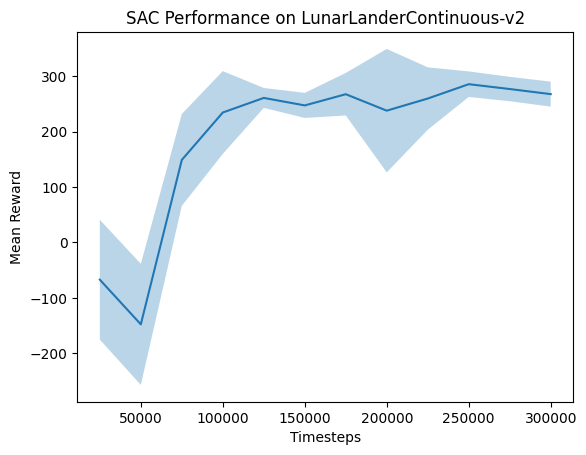

In [9]:
# Load the evaluations.npz file
data = numpy.load(os.path.join(log_dir, "evaluations.npz"))

# Extract the relevant data
timesteps = data["timesteps"]
results = data["results"]

# Calculate the mean and standard deviation of the results
mean_results = numpy.mean(results, axis=1)
std_results = numpy.std(results, axis=1)

# Plot the results
matplotlib.pyplot.figure()
matplotlib.pyplot.plot(timesteps, mean_results)
matplotlib.pyplot.fill_between(timesteps,
                               mean_results - std_results,
                               mean_results + std_results,
                               alpha=0.3)

matplotlib.pyplot.xlabel("Timesteps")
matplotlib.pyplot.ylabel("Mean Reward")
matplotlib.pyplot.title(f"SAC Performance on {env_str}")
matplotlib.pyplot.show()